# Mental Health & Social Media Analysis Notebook

## Load Datasets

In [1]:
import pandas as pd
import numpy as np

# ========== 1. Read 4 dataset ==========
stress_df = pd.read_csv("Stress Level Detection Based on Daily Activities.csv")
mh_df = pd.read_csv("mental_health_dataset.csv")
sm_balance_df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")
sm_emo_df = pd.concat([pd.read_csv("train.csv"), pd.read_csv("test.csv")], ignore_index=True)

print("Stress dataset columns:\n", stress_df.columns)
print("\nMental health dataset columns:\n", mh_df.columns)
print("\nSocial media & mental health balance columns:\n", sm_balance_df.columns)
print("\nSocial media usage & emotional well-being columns:\n", sm_emo_df.columns)


Stress dataset columns:
 Index(['Age', 'Gender', 'Work hours', 'Screen time', 'Sleep time',
       'Exercise frequency', 'Mood Stability', 'Fatigue level', 'Headache ',
       'Work_life Balance', 'Social Support'],
      dtype='object')

Mental health dataset columns:
 Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

Social media & mental health balance columns:
 Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

Social media usage & emotional well-being columns:
 Index(['User_ID', 'Age', 'Gender', 'Platform', 'D

## Preprocess and Aggregate Dataset

In [2]:
import pandas as pd
import numpy as np

def build_from_stress_df(df):
    tmp = pd.DataFrame()
    tmp["age"] = df["Age"]
    tmp["gender"] = df["Gender"]

    tmp["screen_time_hours"] = pd.to_numeric(df["Screen time"], errors="coerce")
    tmp["sleep_hours"] = pd.to_numeric(df["Sleep time"], errors="coerce")
    tmp["exercise_freq"] = pd.to_numeric(df["Exercise frequency"], errors="coerce")

    mood_raw = df["Mood Stability"]

    if pd.api.types.is_numeric_dtype(mood_raw):
        tmp["stress_level"] = 10 - pd.to_numeric(mood_raw, errors="coerce")
    else:
        mood_map = {"Low": 8,"Medium": 5,"High": 2,"Stable": 3,"Unstable": 8,"Very High": 1,"Very Low": 9}
        tmp["stress_level"] = mood_raw.map(mood_map)

    tmp["happiness_index"] = np.nan
    return tmp


def build_from_mh_df(df):
    tmp = pd.DataFrame()
    tmp["age"] = df["age"]
    tmp["gender"] = df["gender"]
    tmp["sleep_hours"] = df["sleep_hours"]
    tmp["exercise_freq"] = df["physical_activity_days"]
    tmp["screen_time_hours"] = np.nan
    tmp["stress_level"] = df["stress_level"]

    if "depression_score" in df.columns and "anxiety_score" in df.columns:
        tmp["happiness_index"] = 10 - (df["depression_score"] + df["anxiety_score"]) / 2
    else:
        tmp["happiness_index"] = np.nan
    return tmp


def build_from_sm_balance_df(df):
    tmp = pd.DataFrame()
    tmp["age"] = df["Age"]
    tmp["gender"] = df["Gender"]
    tmp["screen_time_hours"] = df["Daily_Screen_Time(hrs)"]
    tmp["sleep_hours"] = df["Sleep_Quality(1-10)"]
    tmp["exercise_freq"] = df["Exercise_Frequency(week)"]
    tmp["stress_level"] = df["Stress_Level(1-10)"]
    tmp["happiness_index"] = df["Happiness_Index(1-10)"]
    tmp["platform"] = df["Social_Media_Platform"]
    return tmp


def build_from_sm_emo_df(df):
    tmp = pd.DataFrame()
    tmp["age"] = df["Age"]
    tmp["gender"] = df["Gender"]
    tmp["screen_time_hours"] = df["Daily_Usage_Time (minutes)"] / 60
    tmp["sleep_hours"] = np.nan
    tmp["exercise_freq"] = np.nan

    emotion_map = {"Happy": 4,"Excited": 4,"Calm": 3,"Neutral": 2,
                   "Sad": 1,"Anxious": 1,"Stressed": 1,"Depressed": 0,"Angry": 0}
    tmp["happiness_index"] = df["Dominant_Emotion"].map(emotion_map)
    tmp["stress_level"] = np.nan
    tmp["platform"] = df["Platform"]
    return tmp


df_list = [
    build_from_stress_df(stress_df),
    build_from_mh_df(mh_df),
    build_from_sm_balance_df(sm_balance_df),
    build_from_sm_emo_df(sm_emo_df)
]

full_df = pd.concat(df_list, ignore_index=True)
full_df = full_df.dropna(subset=["stress_level", "happiness_index"], how="all")

full_df["gender"] = full_df["gender"].astype(str).str.lower().str.strip()
full_df["gender"] = full_df["gender"].replace({
    "m":"male","male":"male","f":"female","female":"female",
    "non-binary":"other","other":"other"
})

mask_quality = full_df["sleep_hours"] <= 10
full_df.loc[mask_quality, "sleep_hours"] = full_df.loc[mask_quality, "sleep_hours"] / 10 * 8

full_df["platform"] = full_df["platform"].astype(str).str.title()

full_df


,age,gender,screen_time_hours,sleep_hours,exercise_freq,stress_level,happiness_index,platform
0,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
1,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
2,22 - 30,female,NaN,NaN,NaN,8.0,NaN,Nan
3,30 - 45,female,NaN,NaN,NaN,3.0,NaN,Nan
5,16 - 21,male,NaN,NaN,NaN,8.0,NaN,Nan
...,...,...,...,...,...,...,...,...
12700,29,other,1.416667,NaN,NaN,NaN,2.0,Facebook
12704,32,male,2.166667,NaN,NaN,NaN,2.0,Instagram
12708,23,other,0.833333,NaN,NaN,NaN,2.0,Linkedin
12714,22,male,1.166667,NaN,NaN,NaN,2.0,Twitter


## Data Cleaning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = full_df.copy()

def convert_age(x):
    try:
        return float(x)
    except:
        pass
    if isinstance(x, str) and "-" in x:
        parts = x.replace(" ", "").split("-")
        if len(parts) == 2:
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except:
                return np.nan
    return np.nan

df["age"] = df["age"].apply(convert_age)

## EDA

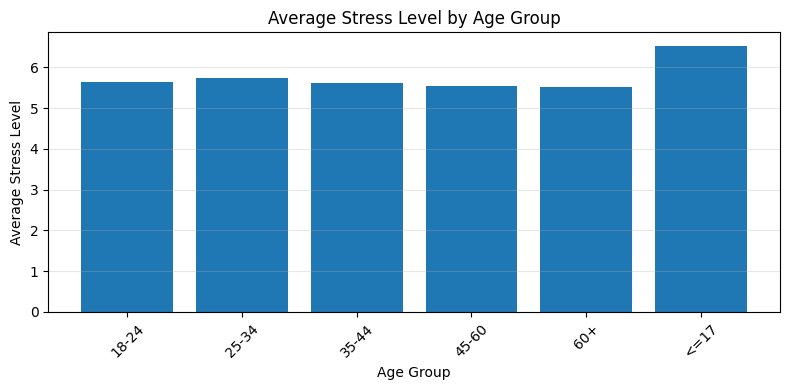

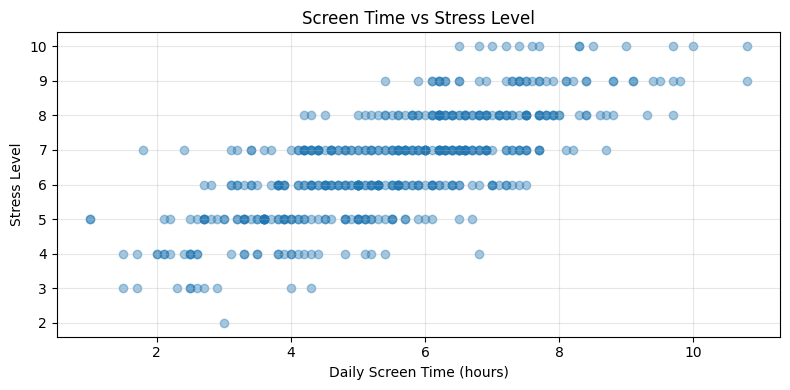

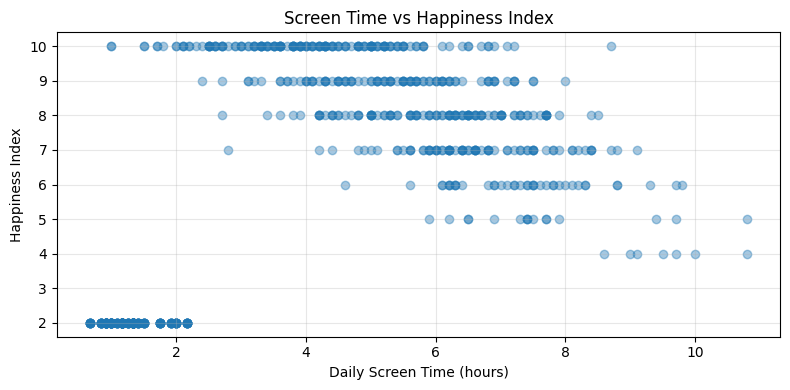

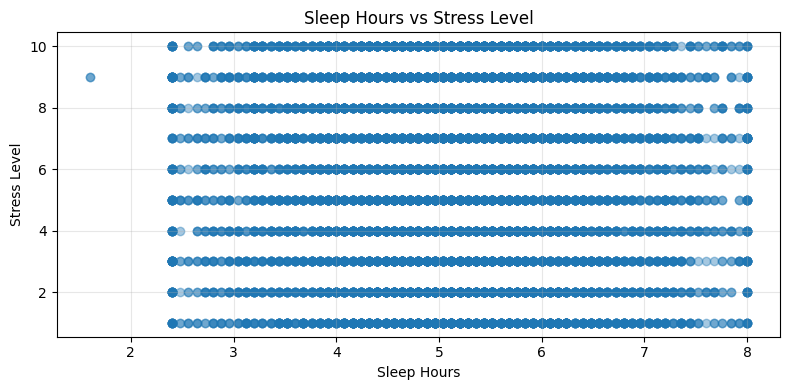

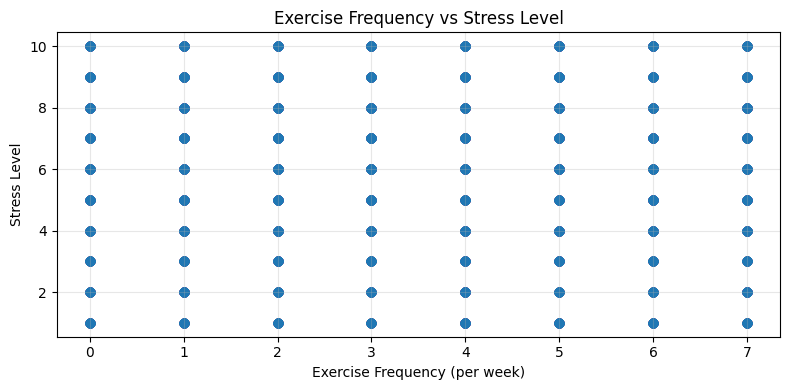

<Figure size 1200x500 with 0 Axes>

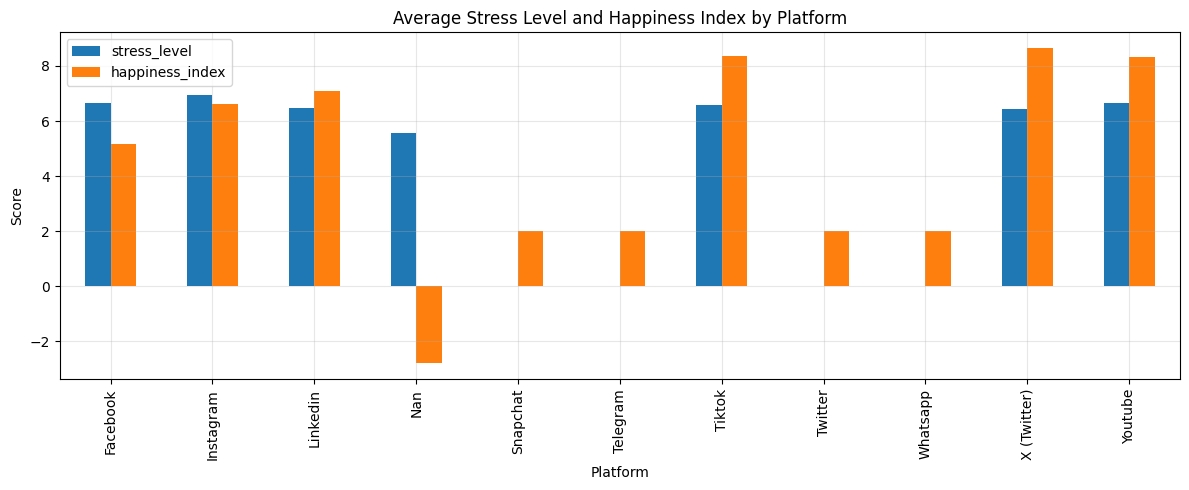

In [4]:
# -------------------------------------------------------------------
# 1. Age vs Average Stress
# -------------------------------------------------------------------

df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 17, 24, 34, 44, 60, 120],
    labels=["<=17", "18-24", "25-34", "35-44", "45-60", "60+"]
)

age_valid = df.dropna(subset=["age_group", "stress_level"])

age_groups = age_valid["age_group"].unique().tolist()

avg_stress = [
    age_valid[age_valid["age_group"] == g]["stress_level"].mean()
    for g in age_groups
]

plt.figure(figsize=(8, 4))
plt.bar(age_groups, avg_stress)
plt.xlabel("Age Group")
plt.ylabel("Average Stress Level")
plt.title("Average Stress Level by Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 2. Screen time vs Stress
# -------------------------------------------------------------------
clean_df = df.dropna(subset=["screen_time_hours", "stress_level"])

plt.figure(figsize=(8, 4))
plt.scatter(clean_df["screen_time_hours"], clean_df["stress_level"], alpha=0.4)
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Stress Level")
plt.title("Screen Time vs Stress Level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 3. Screen time vs Happiness
# -------------------------------------------------------------------
clean_df = df.dropna(subset=["screen_time_hours", "happiness_index"])

plt.figure(figsize=(8, 4))
plt.scatter(clean_df["screen_time_hours"], clean_df["happiness_index"], alpha=0.4)
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Happiness Index")
plt.title("Screen Time vs Happiness Index")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 4. Sleep hours vs Stress
# -------------------------------------------------------------------
clean_df = df.dropna(subset=["sleep_hours", "stress_level"])

plt.figure(figsize=(8, 4))
plt.scatter(clean_df["sleep_hours"], clean_df["stress_level"], alpha=0.4)
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.title("Sleep Hours vs Stress Level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 5. Exercise vs Stress
# -------------------------------------------------------------------
clean_df = df.dropna(subset=["exercise_freq", "stress_level"])

plt.figure(figsize=(8, 4))
plt.scatter(clean_df["exercise_freq"], clean_df["stress_level"], alpha=0.4)
plt.xlabel("Exercise Frequency (per week)")
plt.ylabel("Stress Level")
plt.title("Exercise Frequency vs Stress Level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 6. Platform analysis
# -------------------------------------------------------------------

platform_df = full_df.dropna(subset=["platform"])
platform_df = platform_df.groupby("platform")[["stress_level","happiness_index"]].mean()

# Plot bar chart
plt.figure(figsize=(12,5))
platform_df.plot(kind="bar", figsize=(12,5))
plt.title("Average Stress Level and Happiness Index by Platform")
plt.xlabel("Platform")
plt.ylabel("Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## Prediction Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

feature_cols = ["age","gender","screen_time_hours","sleep_hours","exercise_freq"]
target_cols = ["stress_level","happiness_index"]

model_df = df[feature_cols + target_cols].dropna()
X = model_df[feature_cols]
y = model_df[target_cols]

numeric_features = ["age","screen_time_hours","sleep_hours","exercise_freq"]
categorical_features = ["gender"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
])

models = {
    "LinearRegression": MultiOutputRegressor(LinearRegression()),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(n_estimators=200)),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor()),
    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=6,
        subsample=0.9, colsample_bytree=0.9, objective='reg:squarederror'))
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

results = {}
for name, reg in models.items():
    print(f"Training {name}")
    model = Pipeline([("preprocessor", preprocessor), ("regressor", reg)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred, multioutput="raw_values")
    results[name] = {"model": model, "r2": r2, "rmse": rmse}

best_model_name = min(results, key=lambda x: results[x]["rmse"])
best_model = results[best_model_name]["model"]
best_model_name

Training LinearRegression
Training RandomForest
Training GradientBoosting
Training XGBoost


'LinearRegression'

In [6]:
# These attributes are the features used for modeling
model_df

,age,gender,screen_time_hours,sleep_hours,exercise_freq,stress_level,happiness_index
11115,44.0,male,3.1,5.6,5.0,6.0,10.0
11116,30.0,other,5.1,5.6,3.0,8.0,10.0
11117,23.0,other,7.4,4.8,3.0,7.0,6.0
11118,36.0,female,5.7,5.6,1.0,8.0,8.0
11119,34.0,female,7.0,3.2,1.0,7.0,8.0
...,...,...,...,...,...,...,...
11610,23.0,male,6.9,4.0,2.0,7.0,10.0
11611,43.0,female,5.6,5.6,2.0,6.0,9.0
11612,41.0,male,7.7,4.0,2.0,7.0,8.0
11613,23.0,male,4.2,7.2,2.0,7.0,9.0


## Model Evaluation

========= Model Evaluation =========

=== Performance for: stress_level ===
R²:   0.5622
MAE:  0.8459
RMSE: 1.0395
MAPE: 0.1510
Explained Variance: 0.5660

=== Performance for: happiness_index ===
R²:   0.5335
MAE:  0.8842
RMSE: 1.0707
MAPE: 0.1164
Explained Variance: 0.5336


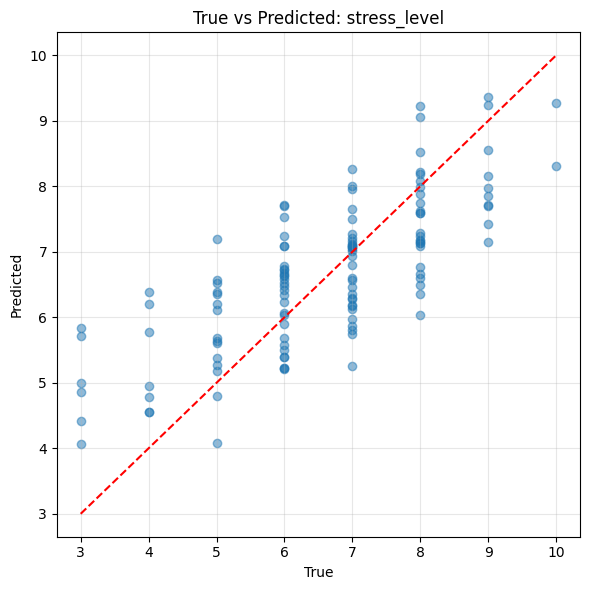

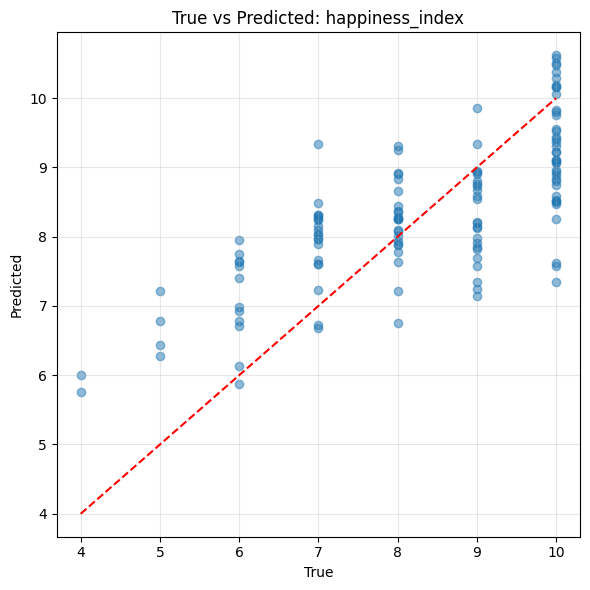

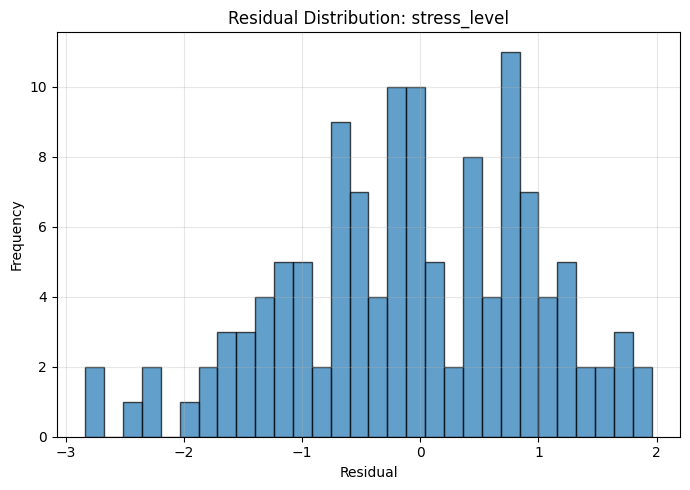

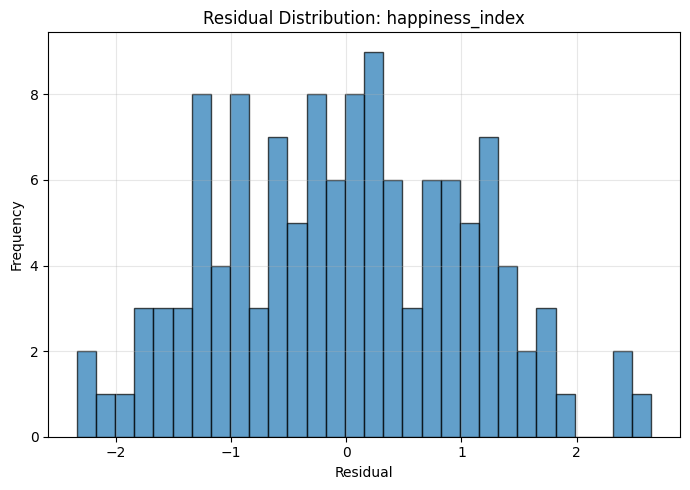

This model does not provide feature importances.


In [7]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, explained_variance_score
)
import numpy as np

print("========= Model Evaluation =========")

# Compute stress & happiness performance
for i, target in enumerate(["stress_level", "happiness_index"]):
    print(f"\n=== Performance for: {target} ===")

    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    mape = mean_absolute_percentage_error(y_test.iloc[:, i], y_pred[:, i])
    ev = explained_variance_score(y_test.iloc[:, i], y_pred[:, i])

    print(f"R²:   {r2:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"Explained Variance: {ev:.4f}")


targets = ["stress_level", "happiness_index"]

for i, target in enumerate(targets):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"True vs Predicted: {target}")
    plt.grid(alpha=0.3)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             linestyle='--', color='red')
    plt.tight_layout()
    plt.show()


for i, target in enumerate(targets):
    residuals = y_test.iloc[:, i] - y_pred[:, i]

    plt.figure(figsize=(7,5))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Residual Distribution: {target}")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Find the internal regressor of the model
reg = best_model.named_steps["regressor"]

# Multi-output model → Take the feature importances of the first sub-model
try:
    importances = reg.estimators_[0].feature_importances_
except:
    print("This model does not provide feature importances.")
    importances = None

if importances is not None:
    ohe = best_model.named_steps["preprocessor"].named_transformers_["cat"]["onehot"]
    ohe_features = ohe.get_feature_names_out(["gender"])

    feature_names = ["age", "screen_time_hours", "sleep_hours", "exercise_freq"] + list(ohe_features)

    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(8, 6))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


## Usage of this model as recommender system

Ask the user to input "age	gender	screen_time_hours	sleep_hours	exercise_freq". This model can predict the predicted anxiety and happiness level. If the level is too high/low, ask the user to adjust.